# We are trying to create a game that will most likely be succesfull. The two major questions we have are:
### - Which genre will grow the most in the next 10 years?
### - Which publisher will sell the most in the next 10 years?
### - What type genre are we creating?
### - Who will publish our game?

In [191]:
#Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from itertools import groupby
from statsmodels.tsa.arima.model import ARIMA
plt.style.use('bmh')

In [192]:
#Load Dataset
file = "vgsales.csv"
df = pd.read_csv(file)

In [226]:
df.size

179201

## Exploratory Analysis & Feature Selection/Engineering

In [193]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<AxesSubplot:>

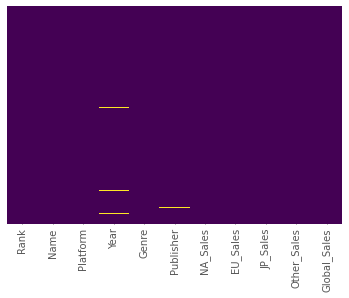

In [194]:
#checking where are the NA values :)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [195]:
df = df.dropna()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [197]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Publisher,count of games and average sales

In [236]:
publishercount = pd.DataFrame(df.groupby('Publisher').size().reset_index(name='count'))
publishercount.sort_values("count", ascending=False)
publisheravgsales = pd.DataFrame(df.groupby(['Publisher', 'Global_Sales'], as_index=False).mean().groupby('Publisher')['Global_Sales'].mean())
publisher = pd.merge(publishercount, publisheravgsales, on='Publisher').sort_values('count', ascending=False)
publisher = publisher.rename(columns={'Global_Sales':'Global_Avg_Sales'})
publisher.head()

,Publisher,count,Global_Avg_Sales
138,Electronic Arts,1339,1.874050
21,Activision,966,2.219953
347,Namco Bandai Games,928,0.905669
524,Ubisoft,918,1.527181
275,Konami Digital Entertainment,823,1.072536


Text(0.5, 1.0, 'Sales per Publisher since 1980')

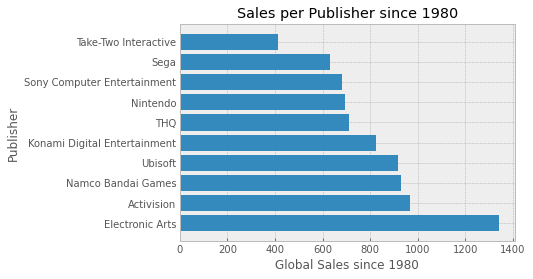

In [232]:
plt.barh(publisher['Publisher'].head(10), publisher['count'].head(10))
plt.xlabel('Global Sales since 1980')
plt.ylabel('Publisher')
plt.title('Sales per Publisher since 1980')

### Genre, count of games and average sales

In [235]:
genrecount = pd.DataFrame(df.groupby('Genre').size().reset_index(name='count'))
genrecount.sort_values("count", ascending=False)
genreavgsales = pd.DataFrame(df.groupby(['Genre', 'Global_Sales'], as_index=False).mean().groupby('Genre')['Global_Sales'].mean())
genre = pd.merge(genrecount, genreavgsales, on='Genre').sort_values('count', ascending=False)
genre = genre.rename(columns={'Global_Sales':'Global_Avg_Sales'})
genre.head()

,Genre,count,Global_Avg_Sales
0,Action,3251,2.483003
10,Sports,2304,2.324170
3,Misc,1686,2.056804
7,Role-Playing,1470,2.415244
8,Shooter,1282,2.559401


Text(0.5, 1.0, 'Sales per Genre since 1980')

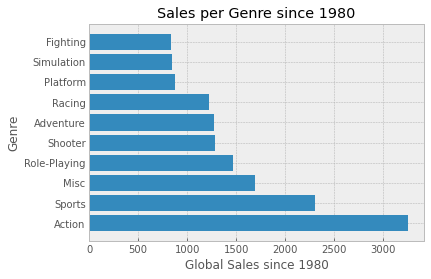

In [228]:
plt.barh(genre['Genre'].head(10), genre['count'].head(10))
plt.xlabel('Global Sales since 1980')
plt.ylabel('Genre')
plt.title('Sales per Genre since 1980')

### Platform, count of games and average sales


In [234]:
platformcount = pd.DataFrame(df.groupby('Platform').size().reset_index(name='count'))
platformcount.sort_values('count',ascending=False)
platformavgsales = pd.DataFrame(df.groupby(['Platform', 'Global_Sales'], as_index=False).mean().groupby('Platform')['Global_Sales'].mean())
platform = pd.merge(platformcount, platformavgsales, on='Platform').sort_values('count', ascending=False)
platform = platform.rename(columns={'Global_Sales':'Global_Avg_Sales'})
platform.head()

,Platform,count,Global_Avg_Sales
4,DS,2131,2.317295
16,PS2,2127,2.118805
17,PS3,1304,2.174706
26,Wii,1290,2.869120
28,X360,1234,2.310345


Text(0.5, 1.0, 'Sales per Platform since 1980')

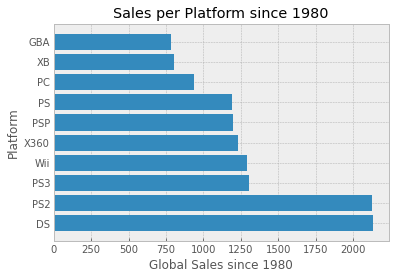

In [230]:
plt.barh(platform['Platform'].head(10), platform['count'].head(10))
plt.xlabel('Global Sales since 1980')
plt.ylabel('Platform')
plt.title('Sales per Platform since 1980')

### Sales after 2010
#### Results might be influenced by total sales per platform overall

In [223]:
df2010 = df.loc[(df['Year'] >= '2010-01-01')]
df2010.size

56474

Text(0.5, 1.0, 'Sales per Genre since 2010')

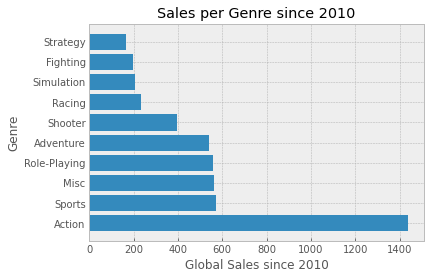

In [229]:
genrecount2010 = pd.DataFrame(df2010.groupby('Genre').size().reset_index(name='count'))
genreavgsales2010 = pd.DataFrame(df2010.groupby(['Genre', 'Global_Sales'], as_index=False).mean().groupby('Genre')['Global_Sales'].mean())
genre2010 = pd.merge(genrecount2010, genreavgsales2010, on='Genre').sort_values('count', ascending=False)
genre2010 = genre2010.rename(columns={'Global_Sales':'Global_Avg_Sales'})
plt.barh(genre2010['Genre'].head(10), genre2010['count'].head(10))
plt.xlabel('Global Sales since 2010')
plt.ylabel('Genre')
plt.title('Sales per Genre since 2010')

Text(0.5, 1.0, 'Sales per Publisher since 2010')

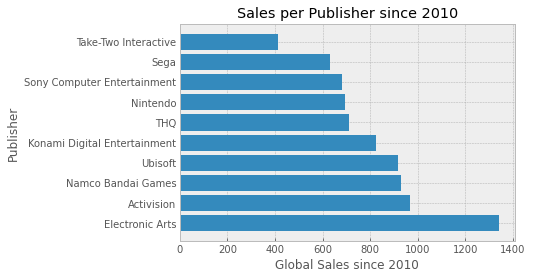

In [233]:
publishercount2010 = pd.DataFrame(df.groupby('Publisher').size().reset_index(name='count'))
publisheravgsales2010 = pd.DataFrame(df2010.groupby(['Publisher', 'Global_Sales'], as_index=False).mean().groupby('Publisher')['Global_Sales'].mean())
publisher2010 = pd.merge(publishercount2010, publisheravgsales2010, on='Publisher').sort_values('count', ascending=False)
publisher2010 = publisher2010.rename(columns={'Global_Sales':'Global_Avg_Sales'})
plt.barh(publisher2010['Publisher'].head(10), publisher2010['count'].head(10))
plt.xlabel('Global Sales since 2010')
plt.ylabel('Publisher')
plt.title('Sales per Publisher since 2010')

## Feature Engineering for ARIMA Model

#### the top 3 genre with the most sales since 2010 are
-
-
-

In [209]:
genrearimadf = pd.DataFrame(df.groupby(['Year','Genre'], as_index=False).agg(globalsalessum=('Global_Sales', 'sum')))
genrearimadf.head()

,Year,Genre,globalsalessum
0,1980-01-01,Action,0.34
1,1980-01-01,Fighting,0.77
2,1980-01-01,Misc,2.71
3,1980-01-01,Shooter,7.07
4,1980-01-01,Sports,0.49


#### the top 3 publishers with the most sales since 2010 are
-
-
-

In [210]:
publisherarimadf = pd.DataFrame(df.groupby(['Year','Publisher'], as_index=False).agg(globalsalessum=('Global_Sales', 'sum')))
publisherarimadf.head()

,Year,Publisher,globalsalessum
0,1980-01-01,Activision,3.02
1,1980-01-01,Atari,8.36
2,1981-01-01,20th Century Fox Video Games,1.35
3,1981-01-01,Activision,8.50
4,1981-01-01,Atari,8.45


### The models we are going to try for the project are
- ARIMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf()

### ARIMA
- Run ARIMA model with current data and no train/test/val dfs. -> project future outcomes
- might not weight negative value consoles that don't produce games anymore

#### Market Basket
- Great to see which console sells the most of each game. {milk} -> {diapers}
- Could also be used to see combinations of {platform, genre, publisher}

### Regression
- Might work to see how sales trend throughout the years, can use platform, genre and publisher

In [211]:
#Market Basket

In [212]:
#Biggest genre growth - ARIMA

In [213]:
#Biggest publisher growth - ARIMA